<a href="https://colab.research.google.com/github/KevinLeo360/Kevin/blob/main/Kevin_Leo_Nelsen_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connect Google Drive**
---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/dataset/Final

/content/drive/MyDrive/dataset/Final


# **Import Packages**

In [ ]:
#my standard packages
import pandas as pd
import numpy as np

In [ ]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # and this is my favorite packages for visualization

In [ ]:
from sklearn import preprocessing

%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [ ]:
#Train-test split
from sklearn.model_selection import train_test_split

#Logistic Regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# tune lambda (denote as 'alpha' in sklearn)
# using GridSearchCV
from sklearn.model_selection import GridSearchCV


# **Import Dataset**

In [ ]:
churn = pd.read_csv("BankChurners.csv") 
churn = churn[churn.columns[:-2]]

In [ ]:
churn

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


**Feature Description**

**CLIENTNUM:** Client number. Unique identifier for the customer holding the account

**Customer_Age:** Demographic variable - Customer's Age in Years

**Gender:** Demographic variable - M=Male, F=Female

**Dependent_count:** Demographic variable - Number of dependents

**Education_Level:** Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

**Marital_Status:** Demographic variable - Married, Single, Divorced, Unknown

**Income_Category:** Demographic variable - Annual Income Category of the account holder (<  40K, 40K - 60K,  60K− 80K,  80K− 120K, > $120K, Unknown)

**Card_Category:** Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

**Months_on_book:** Period of relationship with bank

**Total_Relationship_Count:** Total no. of products held by the customer

**Months_Inactive_12_mon:** No. of months inactive in the last 12 months

**Contacts_Count_12_mon:** No. of Contacts in the last 12 months

**Credit_Limit:** Credit Limit on the Credit Card

**Total_Revolving_Bal:** Total Revolving Balance on the Credit Card

**Avg_Open_To_Buy:** Open to Buy Credit Line (Average of last 12 months)

**Total_Amt_Chng_Q4_Q1:** Change in Transaction Amount (Q4 over Q1)

**Total_Trans_Amt:** Total Transaction Amount (Last 12 months)

**Total_Trans_Ct:** Total Transaction Count (Last 12 months)

**Total_Ct_Chng_Q4_Q1:** Change in Transaction Count (Q4 over Q1)

**Avg_Utilization_Ratio:** Average Card Utilization Ratio

# **Initial EDA**

In [ ]:
churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
churn.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [ ]:
churn.shape #there are 21 columns here, I'll start to check whether the data is containing missing values or not

(10127, 21)

In [ ]:
churn.isnull().sum()# let's check the null value

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
churn[churn.isnull().any(axis=1)]# to make sure the missing value, I use this function

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [ ]:
churn.duplicated().sum() # this function is for checking whether the data has duplicated values or not 

0

In [ ]:
churn.info() # let's see the behavior of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

From the simple data processing above we can taking some insight about the data:
- The dataset is composed of a combination of 10127 row (observations)  per each of our 21 columns (features).
- most of the features are numerical variables (int64 or float64). Considering that all our features are numeric, we can easily calculate their descriptive statistics.
- There are no missing values (Nan) among the data.

In [ ]:
churn.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
churn.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


# **EDA**

## **Target variable Analysis**

Let's start with the target variable
as we can see from the info above, the target variable is still in "str",
so we could do a label encoding for it first

In [ ]:
print(churn['Attrition_Flag'].value_counts())
print('-'* 30)
print('exist ', round(churn['Attrition_Flag'].value_counts()[0]/len(churn) * 100,2), '% of the dataset')
print('churn ', round(churn['Attrition_Flag'].value_counts()[1]/len(churn) * 100,2), '% of the dataset')

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------------------------------
exist  83.93 % of the dataset
churn  16.07 % of the dataset


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



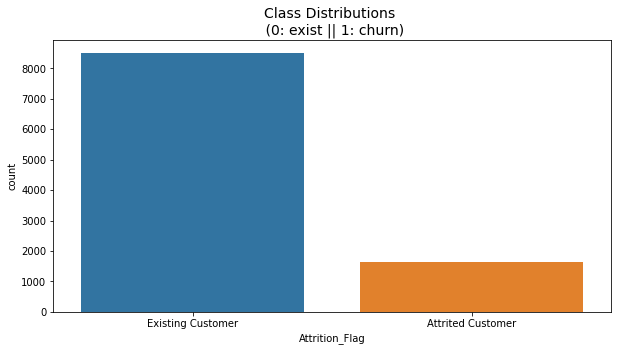

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(churn['Attrition_Flag'])
plt.title('Class Distributions \n (0: exist || 1: churn)', fontsize=14)
plt.show()

From the plot above we know that the distribution of the labels are strongly unbalance, we will use SMOTE later, but we should explore more from the data first

## **Exploring data types**

Let's start exploring our data, we will explore both of categorical data types and numeric, each data type will be visualized differently based on the data types, and the hue is 'Attrited_Flag'

In [ ]:
#let's set the categorical variables
categoricals = churn.select_dtypes(include=['object']).columns.tolist()
categoricals

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

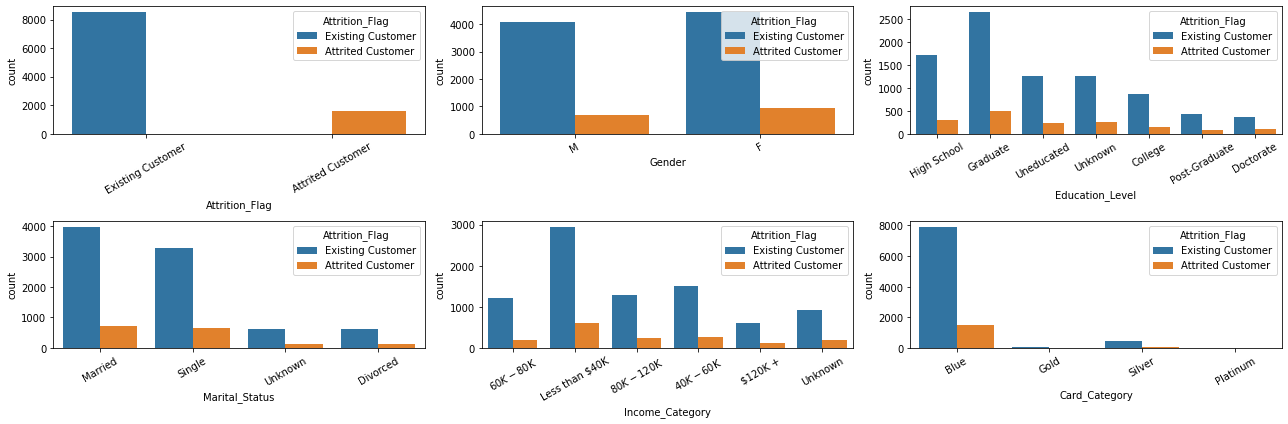

In [ ]:
features = categoricals[:]
plt.figure(figsize=(18,6))
for i in range (0, len(features)):
    plt.subplot(2, len(features)//2, i+1)
    sns.countplot(data= churn,
                  x=features[i],
                  hue='Attrition_Flag')
    plt.xticks(rotation=30)
    plt.tight_layout()

The bar plot above give us some insights:
- most of the credit card user are
- most of the credit card user are graduate student, and they have the most churn count too
- most of the credit card user are married
- most of the credit card user are people with income less than $40k a year
- most of the credit card user are using "blue" card type  

In [ ]:
#now, let's set the numeric data
num = churn.select_dtypes(exclude=['object']).columns.tolist()
num

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

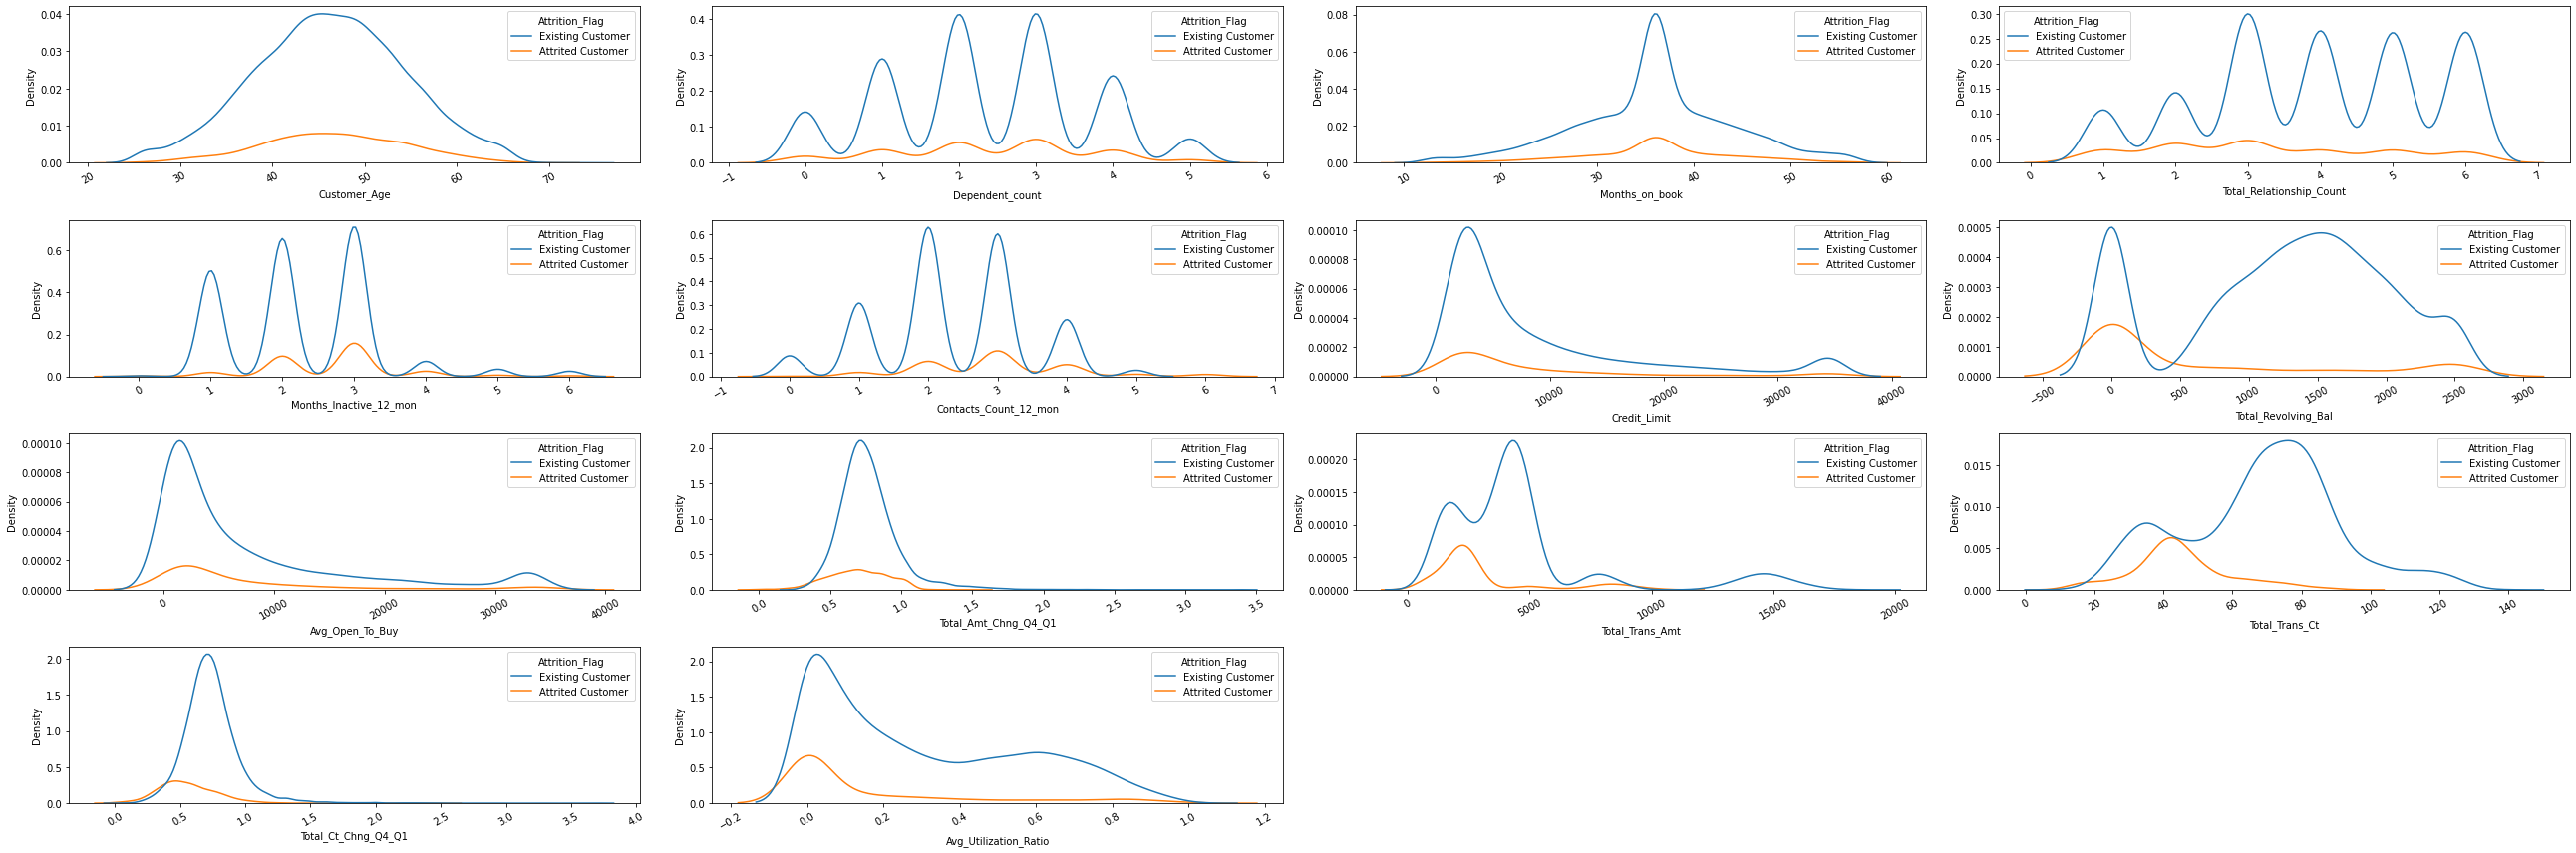

In [ ]:
features = num[1:] 
plt.figure(figsize=(36,12))
for i in range (0, len(features)):
    plt.subplot(4, len(features)//3, i+1)
    sns.kdeplot(data= churn,
                  x=features[i],
                  hue='Attrition_Flag')
    plt.xticks(rotation=30)
    plt.tight_layout()

From the plot above, we could take some insights:
- customer age peaks between the age of 40 - 50
- Most of customer have Months of book between 30 - 40 months
- 

In [ ]:
total_ct_ = churn[(churn['Total_Trans_Ct'] >= 60)&(churn['Total_Trans_Ct'] <= 100)]

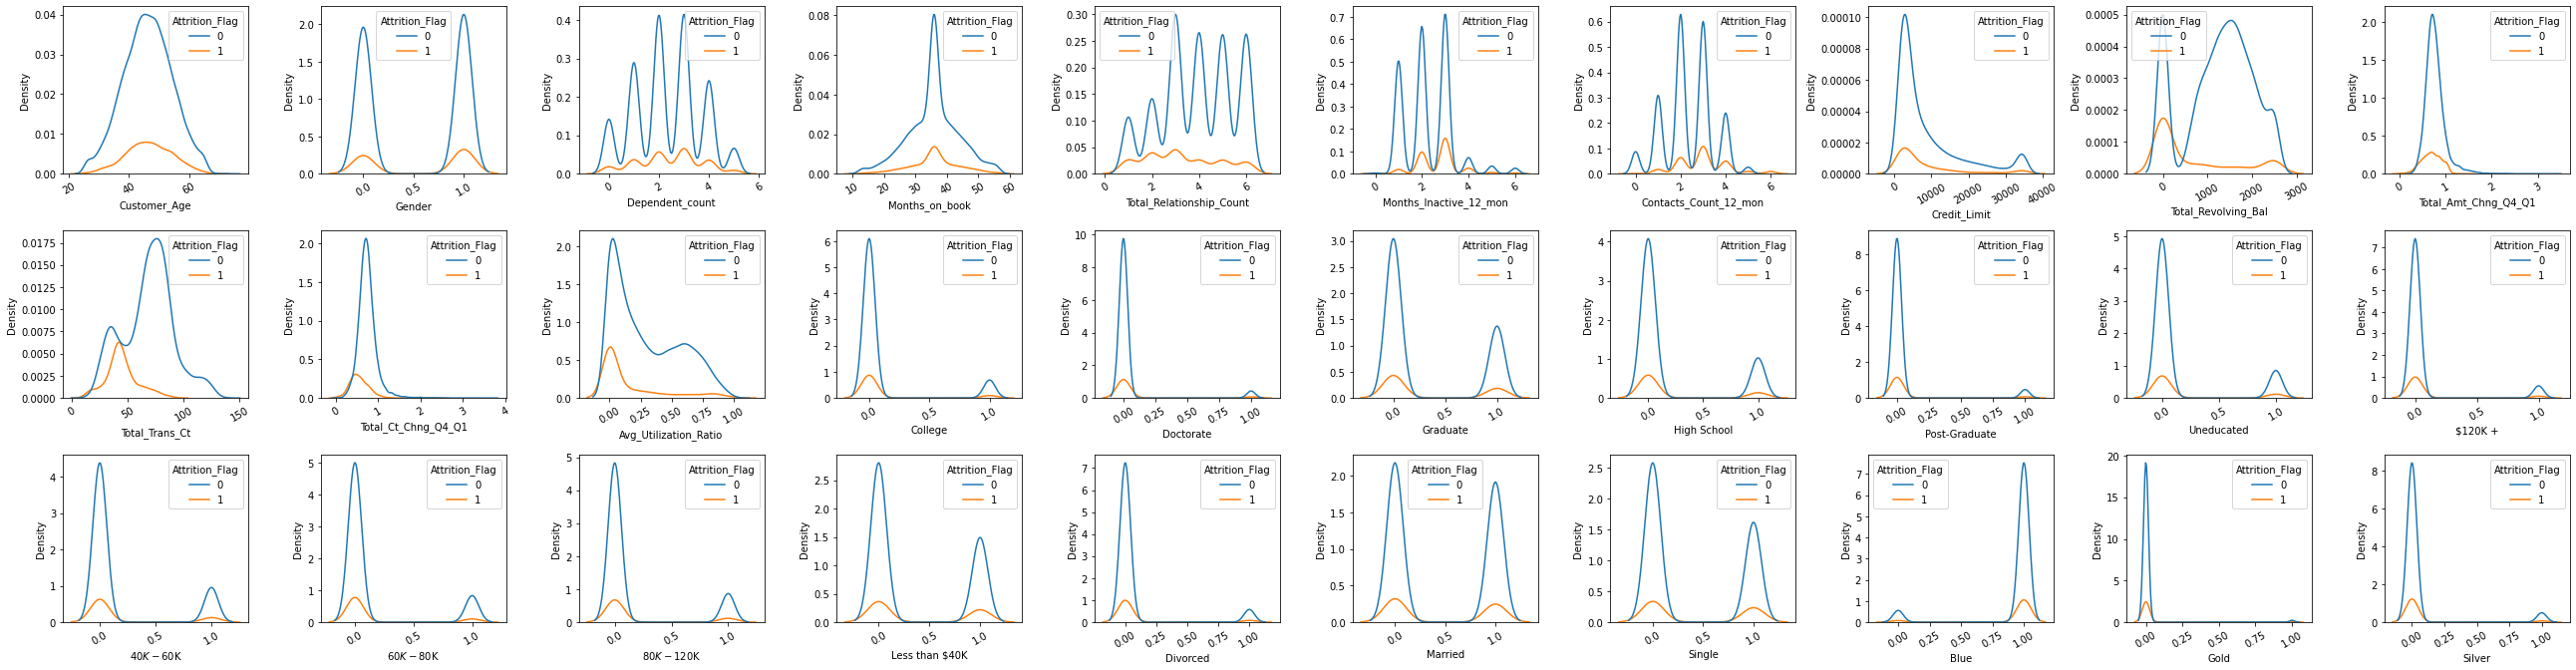

In [ ]:
num = total_ct_.select_dtypes(exclude=['object']).columns.tolist()
features = num[1:] 
plt.figure(figsize=(36,12))
for i in range (0, len(features)):
    plt.subplot(4, len(features)//3, i+1)
    sns.kdeplot(data= churn,
                  x=features[i],
                  hue='Attrition_Flag')
    plt.xticks(rotation=30)
    plt.tight_layout()

## **Feature Engineering**

In [ ]:
churn.Attrition_Flag = churn.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
churn.Gender = churn.Gender.replace({'F':1,'M':0})
churn = pd.concat([churn,pd.get_dummies(churn['Education_Level']).drop(columns=['Unknown'])],axis=1)
churn = pd.concat([churn,pd.get_dummies(churn['Income_Category']).drop(columns=['Unknown'])],axis=1)
churn = pd.concat([churn,pd.get_dummies(churn['Marital_Status']).drop(columns=['Unknown'])],axis=1)
churn = pd.concat([churn,pd.get_dummies(churn['Card_Category']).drop(columns=['Platinum'])],axis=1)
churn.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)

In [ ]:
churn

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,0,49,1,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,51,0,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,0,40,1,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,40,0,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
10123,1,41,0,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
10124,1,44,1,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
10125,1,30,0,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


## **Checking Multicollinearity**

In [ ]:
churn.corr('spearman')[churn.corr('spearman') >= 0.8]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
Attrition_Flag,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Relationship_Count,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_Inactive_12_mon,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contacts_Count_12_mon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_Limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.931431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Revolving_Bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


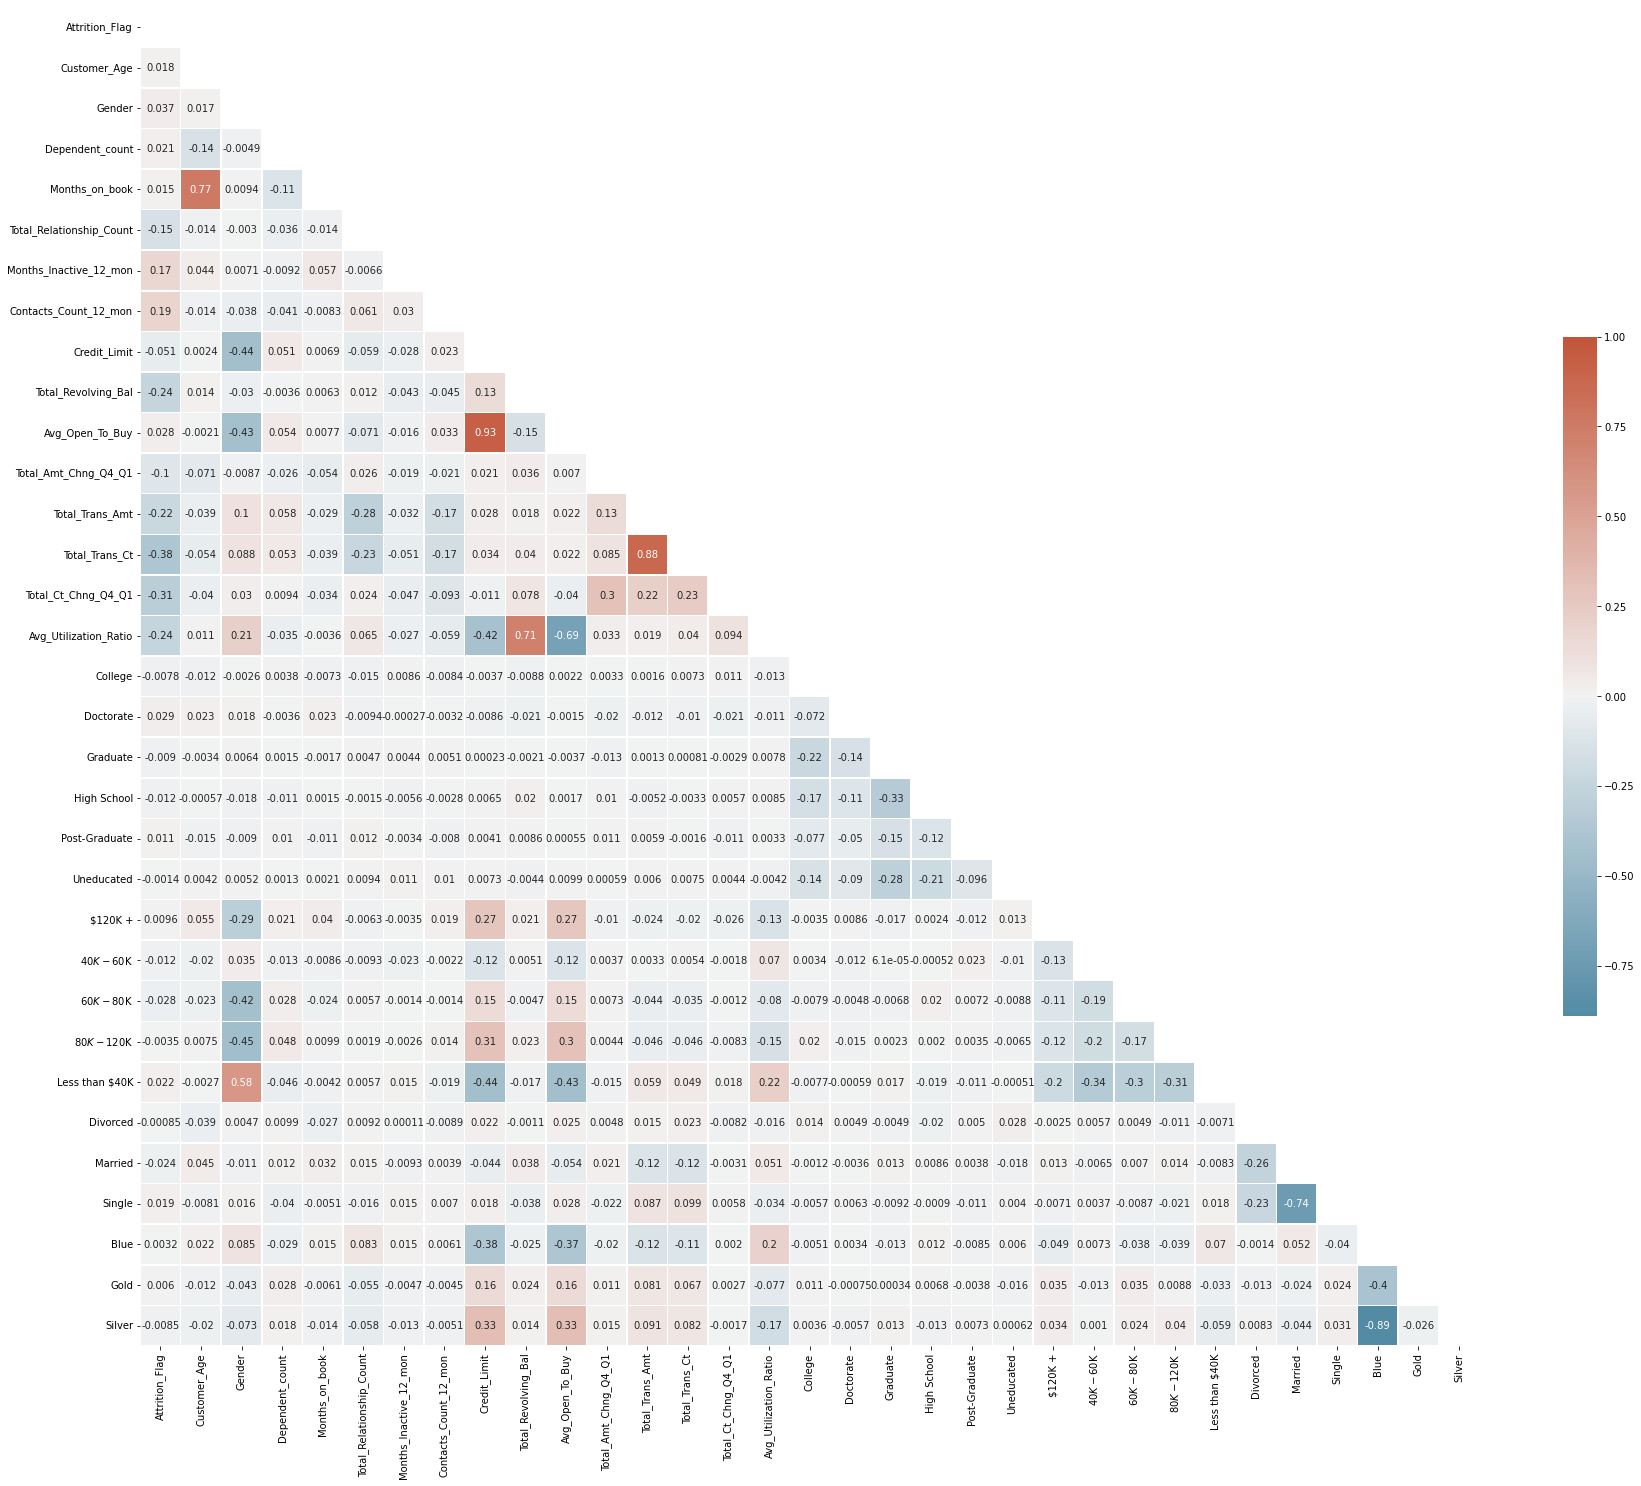

In [ ]:
# EDA & VISUALIZATIONS

# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(30, 25))
mat = churn.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
churn.corr('pearson')[churn.corr('pearson') >= 0.8]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
Attrition_Flag,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Relationship_Count,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_Inactive_12_mon,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contacts_Count_12_mon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_Limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.995981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Revolving_Bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


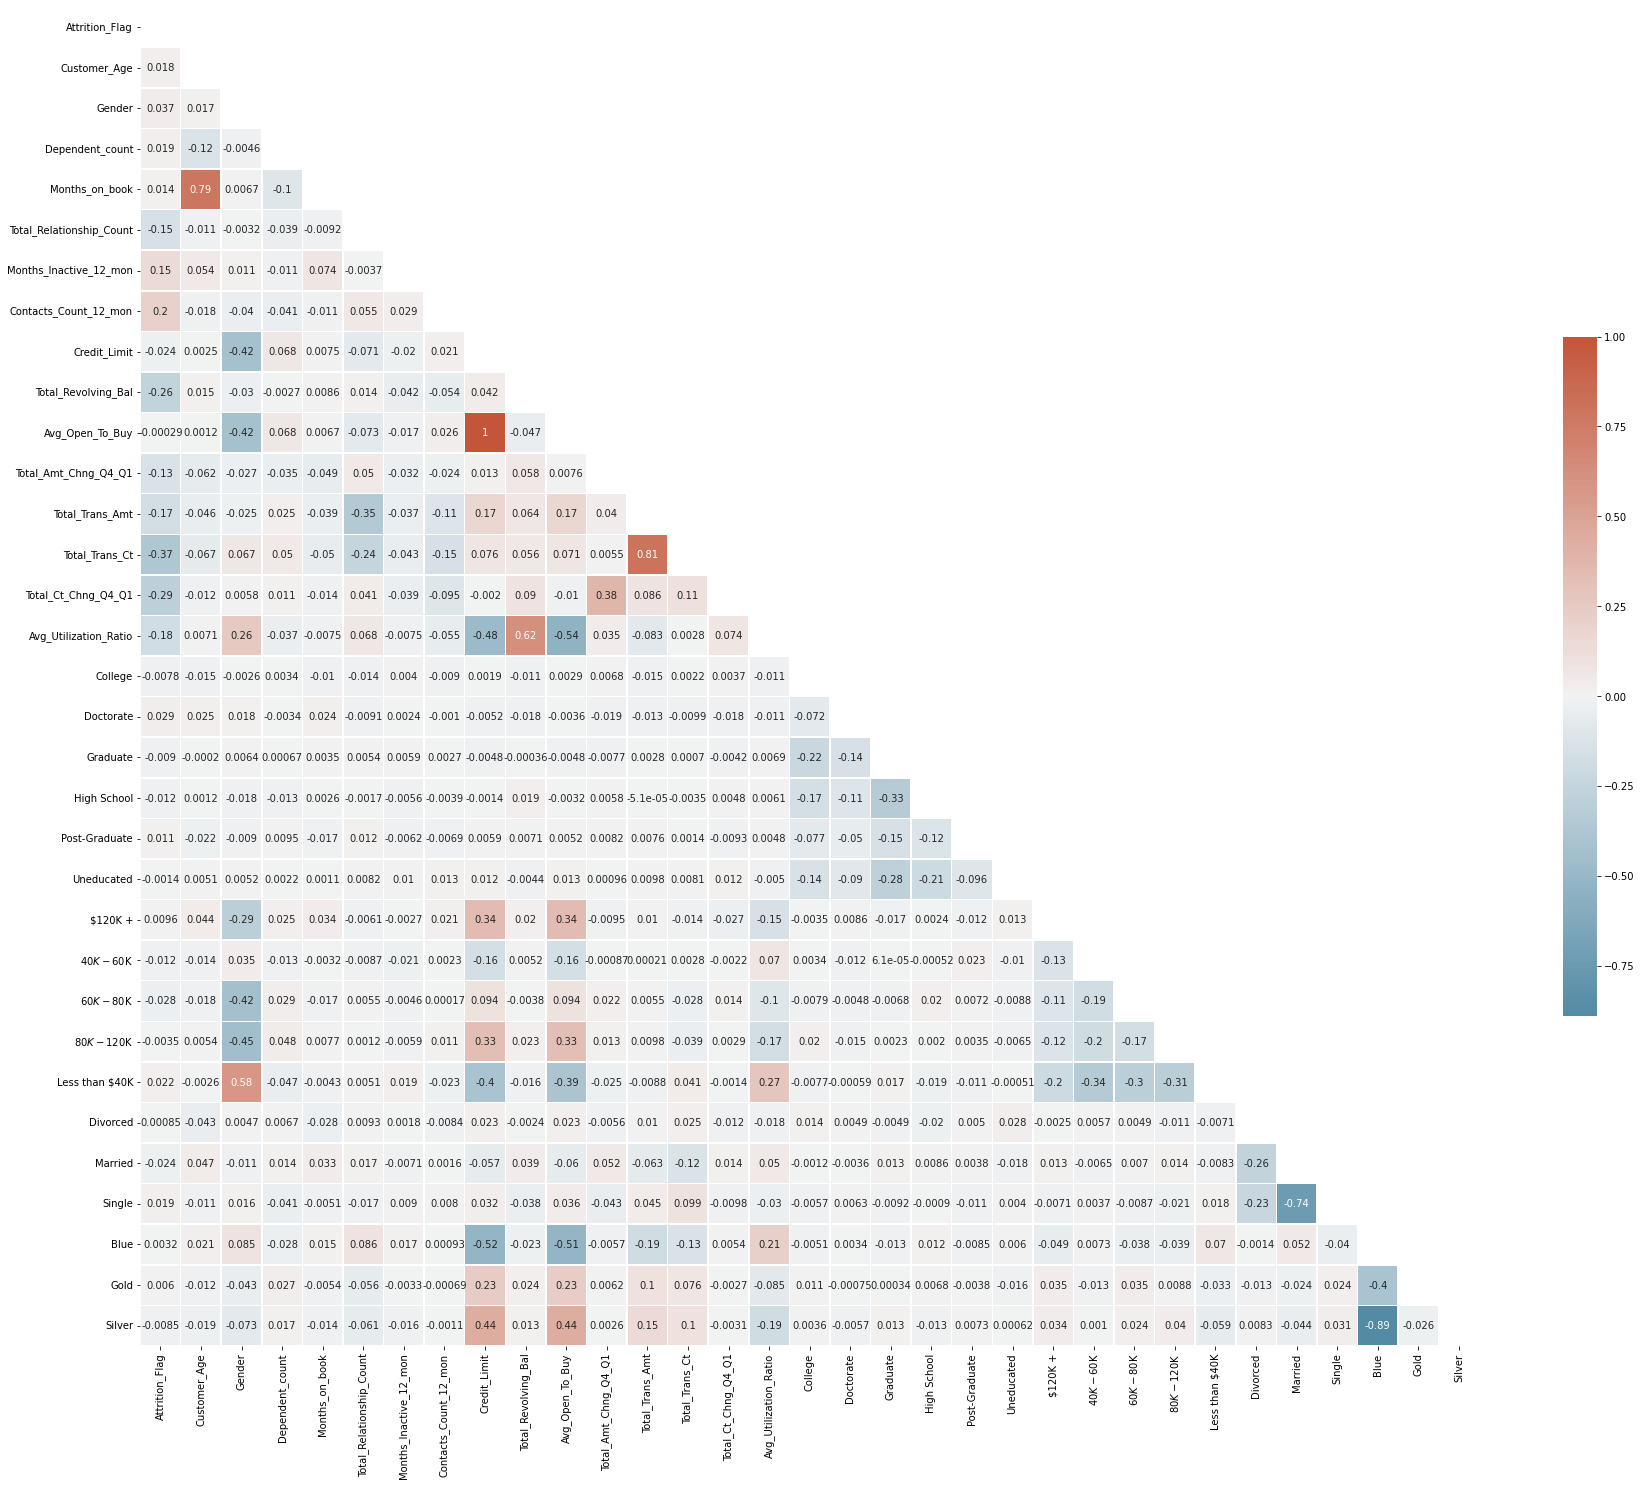

In [ ]:
# EDA & VISUALIZATIONS

# Correlation Heatmap (pearson)

f, ax = plt.subplots(figsize=(30, 25))
mat = churn.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

From correlation heatmap above, we know that there's multicollinearity between some values, Avg_Open_to_Buy vs Credit_Limit, and Total_Trans_Ct vs Total_Trans_Amt, we will remove Avg_Open_to_Buy and Total_Trans_Amt because they have lower correlation to the target variable than the other features

In [ ]:
churn.drop(['Total_Trans_Amt','Avg_Open_To_Buy'], inplace=True, axis=1)

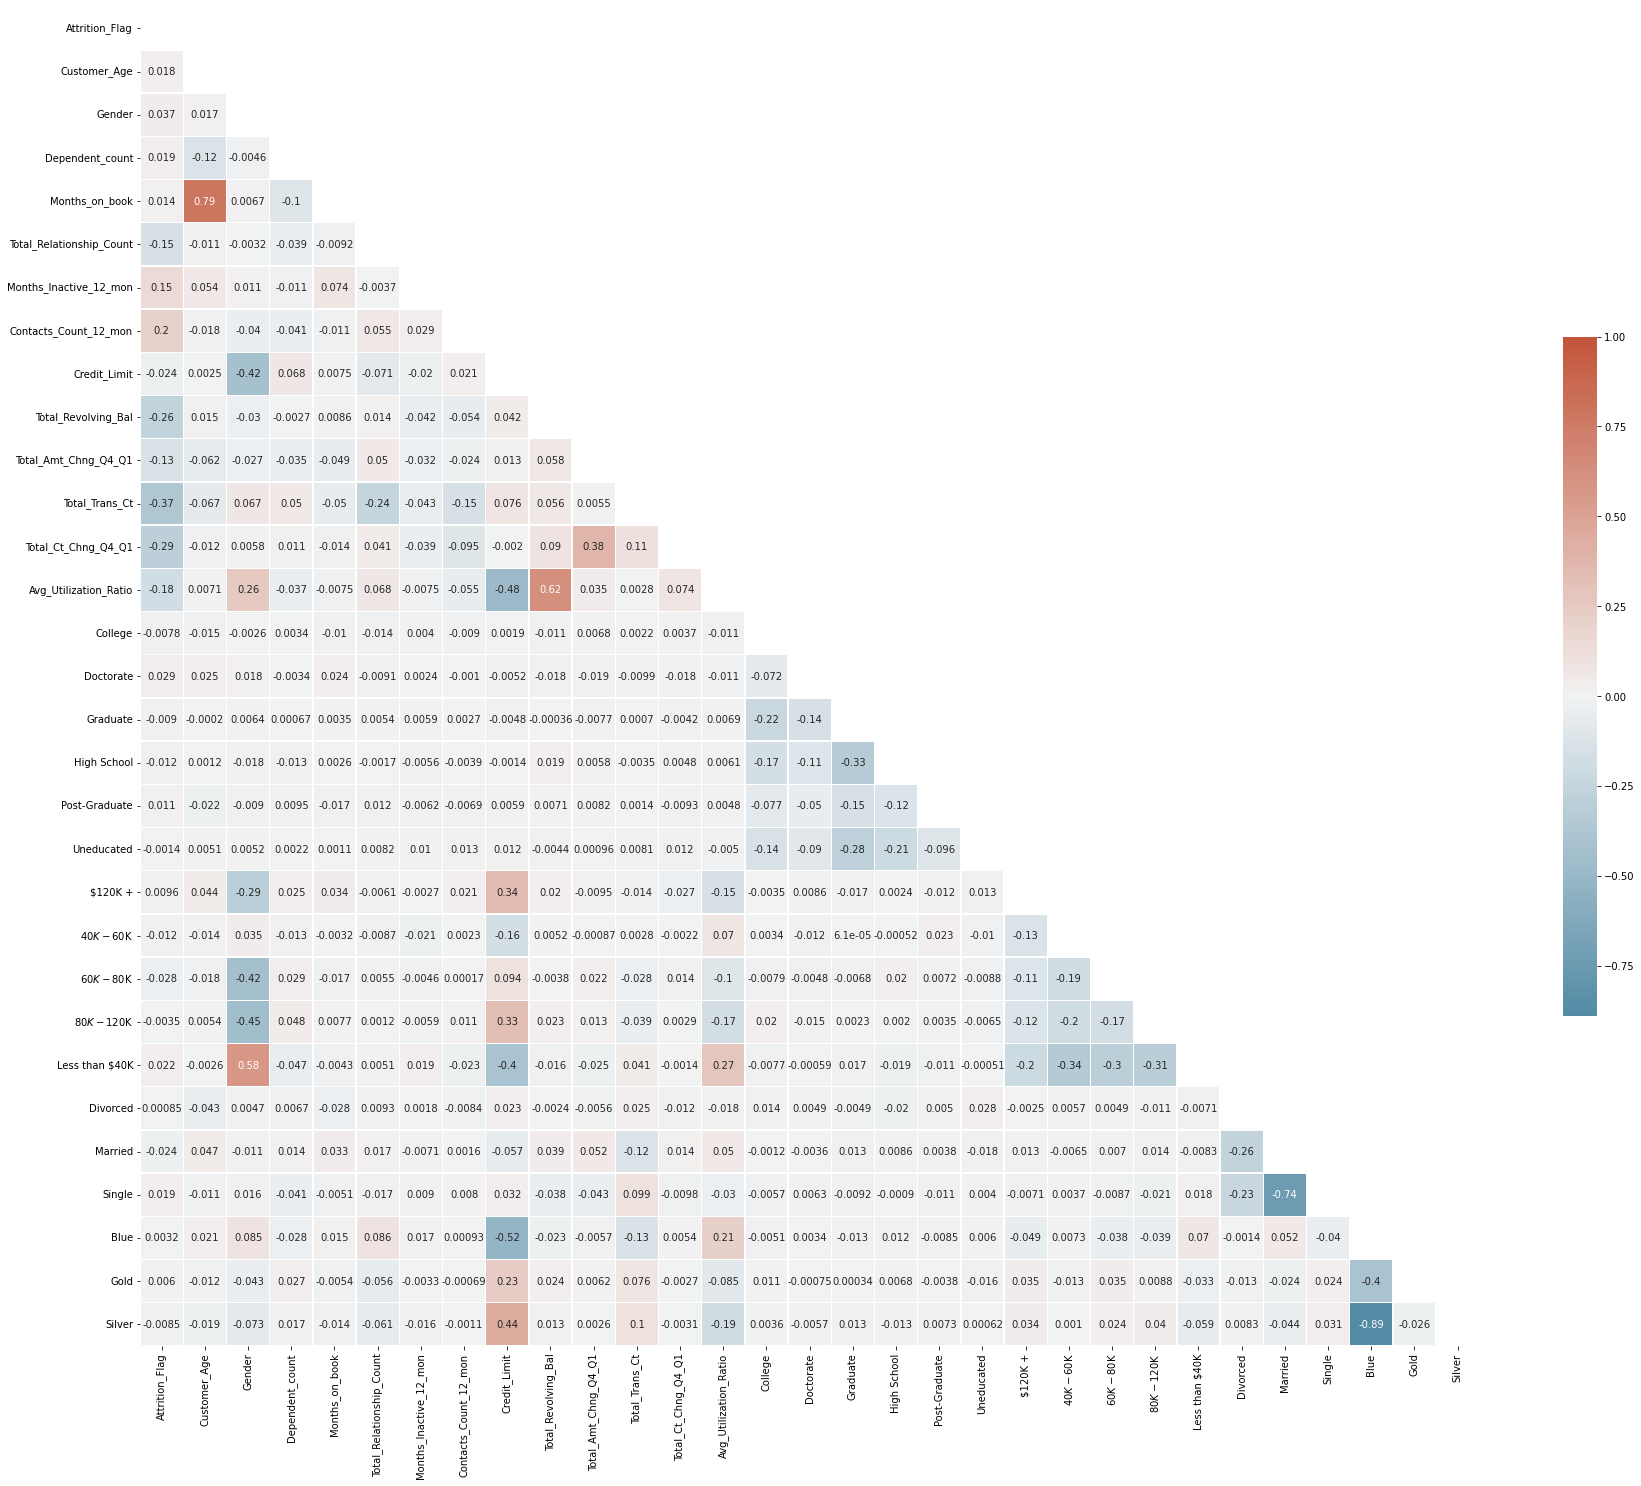

In [ ]:
#let's check the collinearity again
f, ax = plt.subplots(figsize=(30, 25))
mat = churn.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# **Modelling**

In [ ]:
churn

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,1.335,42,1.625,0.061,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,0,49,1,5,44,6,1,2,8256.0,864,1.541,33,3.714,0.105,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,51,0,3,36,4,1,0,3418.0,0,2.594,20,2.333,0.000,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,0,40,1,4,34,3,4,1,3313.0,2517,1.405,20,2.333,0.760,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,40,0,3,21,5,1,0,4716.0,0,2.175,28,2.500,0.000,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,40,3,2,3,4003.0,1851,0.703,117,0.857,0.462,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
10123,1,41,0,2,25,4,2,3,4277.0,2186,0.804,69,0.683,0.511,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
10124,1,44,1,1,36,5,3,4,5409.0,0,0.819,60,0.818,0.000,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
10125,1,30,0,2,36,4,3,3,5281.0,0,0.535,62,0.722,0.000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


Now we have a ready-to-process dataframe, from the dataset, we still have 1 concern.. 

**yes**, the data is imbalanced.. 

what should we do?? 

I'll do some modeling with the original imbalanced data and data with 'class weighted'

The reference for my code is from here: https://grabngoinfo.com/balanced-weights-for-imbalanced-classification/

## **Train Test Split**

In [ ]:
# as always, first thing is to split the data
X = churn.drop(columns='Attrition_Flag').to_numpy()
y = churn[['Attrition_Flag']].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(8101, 30)
(8101,)
(2026, 30)
(2026,)


(None, None)

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Months_on_book            10127 non-null  int64  
 5   Total_Relationship_Count  10127 non-null  int64  
 6   Months_Inactive_12_mon    10127 non-null  int64  
 7   Contacts_Count_12_mon     10127 non-null  int64  
 8   Credit_Limit              10127 non-null  float64
 9   Total_Revolving_Bal       10127 non-null  int64  
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
 14  Colleg

## **Random Forest**

In [ ]:
# Define the Random Forest
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 12.9 s, sys: 56.2 ms, total: 13 s
Wall time: 13 s


It takes 15.5 seconds to finish

In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
24,"{'max_depth': 5, 'n_estimators': 50}",0.455385,1
23,"{'max_depth': 5, 'n_estimators': 40}",0.446923,2
22,"{'max_depth': 5, 'n_estimators': 30}",0.438462,3
20,"{'max_depth': 5, 'n_estimators': 10}",0.438462,4
21,"{'max_depth': 5, 'n_estimators': 20}",0.423846,5
19,"{'max_depth': 4, 'n_estimators': 50}",0.356154,6
15,"{'max_depth': 4, 'n_estimators': 10}",0.354615,7
18,"{'max_depth': 4, 'n_estimators': 40}",0.349231,8
17,"{'max_depth': 4, 'n_estimators': 30}",0.332308,9
16,"{'max_depth': 4, 'n_estimators': 20}",0.315385,10


In [ ]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 4.82 s, sys: 18 ms, total: 4.84 s
Wall time: 4.83 s


In [ ]:
rf_clf_randomcv.score(X_test, y_test)

0.43119266055045874

Now it only takes 7.11 seconds (compared to >5 seconds when using the full GridSearchCV)

In [ ]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,"{'n_estimators': 30, 'max_depth': 5}",0.438462,1
1,"{'n_estimators': 20, 'max_depth': 5}",0.423846,2
9,"{'n_estimators': 30, 'max_depth': 4}",0.332308,3
8,"{'n_estimators': 20, 'max_depth': 3}",0.195385,4
6,"{'n_estimators': 50, 'max_depth': 2}",0.004615,5
2,"{'n_estimators': 20, 'max_depth': 2}",0.000769,6
0,"{'n_estimators': 10, 'max_depth': 1}",0.000000,7
3,"{'n_estimators': 40, 'max_depth': 1}",0.000000,7
5,"{'n_estimators': 50, 'max_depth': 1}",0.000000,7
7,"{'n_estimators': 30, 'max_depth': 1}",0.000000,7


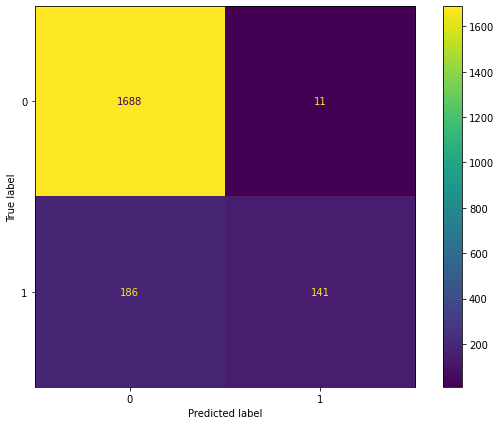

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred_1 = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_1, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1699
           1       0.93      0.43      0.59       327

    accuracy                           0.90      2026
   macro avg       0.91      0.71      0.77      2026
weighted avg       0.91      0.90      0.89      2026



## **With Class Weight**

In [ ]:
# Define the Random Forest
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf_2 = RandomForestClassifier(class_weight='balanced',random_state=42)

In [ ]:
%%time
parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv_2 = GridSearchCV(rf_clf_2, parameters, cv=5, scoring='recall')
rf_clf_gridcv_2.fit(X_train, y_train)

CPU times: user 12.9 s, sys: 51.4 ms, total: 12.9 s
Wall time: 12.9 s


It takes 15.8 seconds to finish

In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv_2.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
24,"{'max_depth': 5, 'n_estimators': 50}",0.837692,1
22,"{'max_depth': 5, 'n_estimators': 30}",0.834615,2
23,"{'max_depth': 5, 'n_estimators': 40}",0.832308,3
4,"{'max_depth': 1, 'n_estimators': 50}",0.827692,4
16,"{'max_depth': 4, 'n_estimators': 20}",0.827692,4
21,"{'max_depth': 5, 'n_estimators': 20}",0.823077,6
17,"{'max_depth': 4, 'n_estimators': 30}",0.820769,7
19,"{'max_depth': 4, 'n_estimators': 50}",0.819231,8
18,"{'max_depth': 4, 'n_estimators': 40}",0.811538,9
9,"{'max_depth': 2, 'n_estimators': 50}",0.810769,10


In [ ]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv_2 = RandomizedSearchCV(rf_clf_2, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv_2.fit(X_train, y_train)

CPU times: user 5.82 s, sys: 31.6 ms, total: 5.85 s
Wall time: 5.84 s


In [ ]:
rf_clf_randomcv_2.score(X_test, y_test)

0.8012232415902141

Now it only takes 5.92 seconds (compared to >5 seconds when using the full GridSearchCV)

In [ ]:
# results of RandomSearchCV class weight
cv_result = pd.DataFrame(rf_clf_randomcv_2.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
6,"{'n_estimators': 50, 'max_depth': 5}",0.837692,1
9,"{'n_estimators': 30, 'max_depth': 5}",0.834615,2
3,"{'n_estimators': 40, 'max_depth': 5}",0.832308,3
0,"{'n_estimators': 50, 'max_depth': 1}",0.827692,4
5,"{'n_estimators': 20, 'max_depth': 4}",0.827692,4
7,"{'n_estimators': 50, 'max_depth': 2}",0.810769,6
4,"{'n_estimators': 10, 'max_depth': 4}",0.809231,7
2,"{'n_estimators': 40, 'max_depth': 2}",0.803077,8
8,"{'n_estimators': 20, 'max_depth': 3}",0.782308,9
1,"{'n_estimators': 10, 'max_depth': 1}",0.762308,10


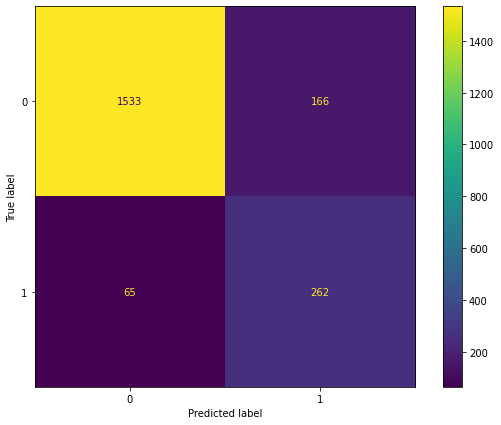

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred_2 = rf_clf_randomcv_2.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_2, labels=rf_clf_randomcv_2.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv_2.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred_2 = rf_clf_randomcv_2.best_estimator_.predict(X_test)
y_pred_22 = rf_clf_randomcv_2.best_estimator_
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1699
           1       0.61      0.80      0.69       327

    accuracy                           0.89      2026
   macro avg       0.79      0.85      0.81      2026
weighted avg       0.90      0.89      0.89      2026



## **SHAP**

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve# Building ROC curve

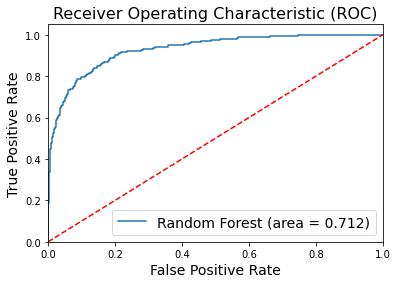

In [ ]:
# Building ROC curve
rf_roc_auc = roc_auc_score(y_test, rf_clf_randomcv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_clf_randomcv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.savefig('RF_ROC', fontsize=14)
plt.show();

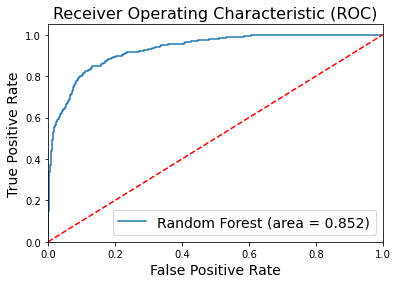

In [ ]:
rf_roc_auc = roc_auc_score(y_test, rf_clf_randomcv_2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_clf_randomcv_2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.savefig('RF_ROC', fontsize=14)
plt.show();

In [ ]:
##% Feature Importance 
##% Feature Importance using shap package 
%pip install shap
import shap
shap.initjs()

     |████████████████████████████████| 371 kB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509229 sha256=cff227337329da6ad93a7afcc1bfcdc6578d0ab12200170ecd8d827626a7e519
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
# Let us have a look on SHAP summary plot
%time
samples = X_train
columns=churn.drop(columns='Attrition_Flag')
explainer = shap.TreeExplainer(rf_clf_randomcv_2.best_estimator_)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


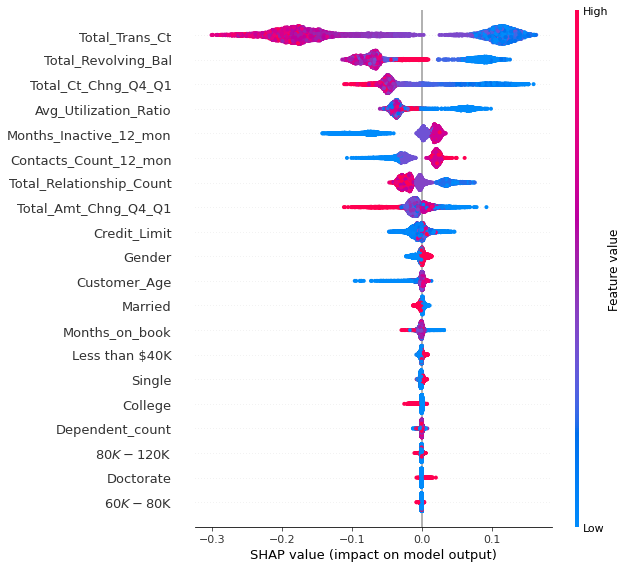

In [ ]:
shap.summary_plot(shap_values[1], samples,feature_names=columns.columns)

- Random Forests that are not given treatment have a high tendency for false  positives

- Random Forest has better performance when it has been given 'class weight' treatment

- Based on feature importance, the total transaction is the feature that brings the most influence

- In the model, so the fewer total transactions a customer has, the more likely it will churn

- Women and married people also have a tendency to churn more

INSIGHT
- Based on the results above, the 3 most important features are related to the total transaction, which means more
- the more credit cards used, the less likely the customer will churn
- For this reason, the marketing strategy that needs to be carried out should also be related to this total transaction,
Like giving promos, or being a family/couple-friendly credit card 

reference:

https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

https://towardsdatascience.com/interpreting-random-forest-and-other-black-box-models-like-xgboost-80f9cc4a3c38

https://www.kaggle.com/josephchan524/bankchurnersclassifier-recall-97-accuracy-95#Data-Visualization

https://towardsdatascience.com/https-medium-com-abrown004-how-to-ease-the-pain-of-working-with-imbalanced-data-a7f7601f18ba

https://towardsdatascience.com/search?q=class%20weight

https://www.kaggle.com/bextuychiev/model-explainability-with-shap-only-guide-u-need
